## CPSC 483-01 Project 4
***
**Name:** Tianzheng Li <br><br>
*All 13 experiments are functional and completed*



# 1. Load dataset
***
The `fetch_california_housing()` dataset is loaded using sklearn.datasets and converted into a numpy DataFrame using `.frame`.

In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np

# Data to data frame
data = sklearn.datasets.fetch_california_housing(as_frame = True)
display(data.frame)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 2. Split data
***
Using sklearn's `train_test_split`, we get the features and target data split into training and test sets.

In [2]:
from sklearn.model_selection import train_test_split

# features
features = train_test_split(data.data, test_size = 0.2, random_state=(2021-3-25))
# target
target = train_test_split(data.target, test_size = 0.2, random_state=(2021-3-25))

# 3. Linear regression and MSE
***
Using sklearn's `LinearRegression()` the data is fitted and the MSE is found. For the training set we get `1.328`, which is slightly lower than the testing set's `1.330`.

In [3]:
from sklearn.linear_model import LinearRegression

# Linear regression predict
def lin_reg_predict(x_data, y_data):
    reg = LinearRegression().fit(x_data, y_data)
    p = []
    for i in range(0, len(x_data)):
        temp = reg.predict(np.array([x_data[i]]))
        p.append(temp)
    return p

In [4]:
from sklearn.metrics import mean_squared_error

# Training sets
print("\033[1mTraining set\033[0m")
abed = features[0]['AveBedrms']
abed = [[i] for i in abed]
medv = target[0]

# Mean squared error
medv_pred = lin_reg_predict(abed, medv)
MSE = mean_squared_error(medv, medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))
# =======================================================

# Testing sets
print("\n\033[1mTesting set\033[0m")
abed_2 = features[1]['AveBedrms']
abed_2 = [[i] for i in abed_2]
medv_2 = target[1]

# Mean squared error
medv_pred = lin_reg_predict(abed_2, medv_2)
MSE = mean_squared_error(medv_2, medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))

Training set
MSE: 1.3278477256171917

Testing set
MSE: 1.3302950780028604


# 4. R_squared
***
Using `LinearRegression()`'s score to get the training set R_squared value we have `0.00288` which is a value that is close to 0, indicating that the regression does not explain much of the variability. The testing set's R_squared is even lower at `0.000553`.

In [5]:
# Linear regression score
def lin_reg_score(x_data, y_data):
    reg = LinearRegression().fit(x_data, y_data)
    return reg.score(x_data, y_data)

In [6]:
# training R_squared of AveBedrms
print("\033[1mTraining set\033[0m")
R_squared = lin_reg_score(abed, medv)
print("\033[1mR_squared: \033[0m" + str(R_squared))
# ======================================================

# testing R_squared of AveBedrms
print("\n\033[1mTesting set\033[0m")
R_squared = lin_reg_score(abed_2, medv_2)
print("\033[1mR_squared: \033[0m" + str(R_squared))

Training set
R_squared: 0.0028776656256584987

Testing set
R_squared: 0.0005525109166536479


# 5. Scatter matrix
***
Using pandas' `scatter_matrix()` we have the plots of each feature pairs. The `MedHouseVal` seems to vary quite a bit from feature to feature, as some go from very dense to very sparse.

array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Ho

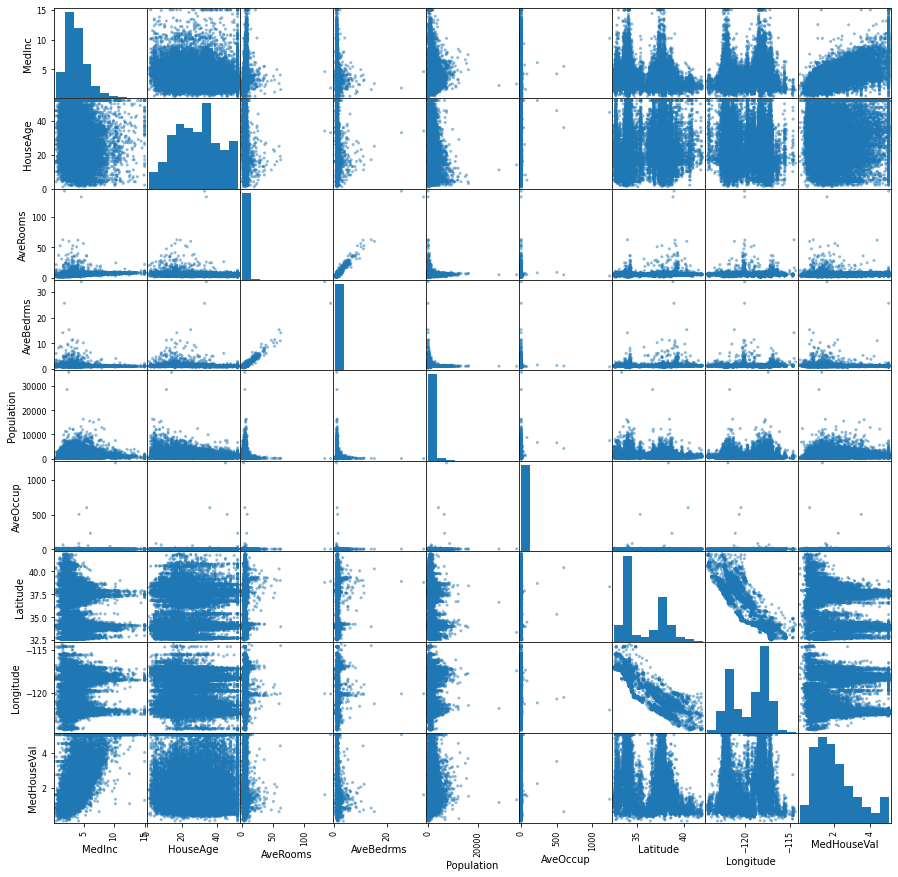

In [7]:
# Scatter matrix
display(pd.plotting.scatter_matrix(data.frame, figsize = (15, 15)))

# 6. Sample scatter matrix
***
After using just 1% of the sample, we see that `AveBedrms` seems to cause `MedHouseVal` to compact while the other plots appear to be more spread out. Since we determined from R_squared that the variability is not affected very much by regression, we see that the plots of `AveBedrms` don't seem to vary much which aligns with what we determined in experiment 4.

array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Ho

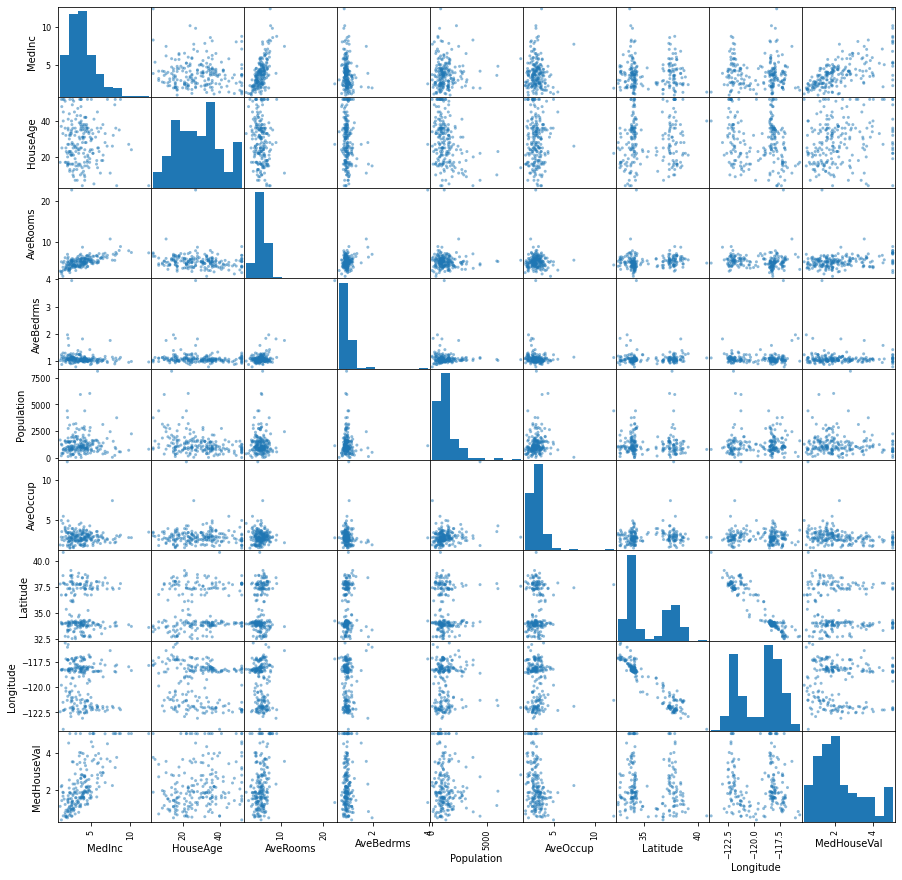

In [8]:
# Scatter matrix with a 1% sample
sample = data.frame.sample(frac = 0.01)
display(pd.plotting.scatter_matrix(sample, figsize = (15, 15)))

# 7. Strongest linear relationship
***
The feature with the strongest linear relationship with `MedHouseVal` appears to be `MedInc`.

# 8. Longitude and latitude
***
The relationship between `MedHouseVal` and `longitude` and `latitude` appears to be rather scattered but between the two it appears they are reflected versions of one another. Upon examining the longitude and latitude map of the state we see that values of longitude and altitude do not change much from location to location which may explain how the plots for `longitude` and `latitude` do not appear to be affected as much as `MedHouseVal`'s plot.

# 9. Covariance
***
Based on the correlation matrix of the data, using `corr()`, we see that the highest covariance for `MedHouseVal` is `0.688` from `MedInc`. This aligns with experiment 7.

In [9]:
# Correlation matrix
corr = data.frame.corr()
display(corr)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


# 10. R_squared of MedInc
***
Since we determined that `MedInc` was the strongest predictor of `MedHouseVal` we get `0.468` as the training set R_squared, which is a much higher value than `AveBedrms`'s `0.00288`. The testing set's is slightly higher at `0.495`.

In [10]:
from sklearn.preprocessing import StandardScaler

# Training R_squared of MedInc
print("\033[1mTraining set\033[0m")
medi = features[0]['MedInc']
medi = [[i] for i in medi]

R_squared = lin_reg_score(medi, medv)
print("\033[1mR_squared: \033[0m" + str(R_squared))
# =========================================

# Testing R_squared of MedInc
print("\n\033[1mTesting set\033[0m")
medi_2 = features[1]['MedInc']
medi_2 = [[i] for i in medi_2]

R_squared = lin_reg_score(medi_2, medv_2)
print("\033[1mR_squared: \033[0m" + str(R_squared))

Training set
R_squared: 0.468045955604915

Testing set
R_squared: 0.4954135367545054


# 11. All features
***
Using all 8 input features we find the R_squared and MSE for `MedHouseVal`. The training set R_squared is `0.602`, which is higher than the previous which uses only the `MedInc`. This leads me to believe that all features are an even stronger predictor than just the one feature. The resulting MSE is `0.530`, which is lower than the previous `1.328`. This reinforces that it is a better fit for the data. The testing set also follows with R_squared slightly higher and MSE slightly lower.

In [11]:
# training set R_squared of all 8 features
print("\033[1mTraining set\033[0m")
R_squared = lin_reg_score(features[0], medv)
print("\033[1mR_squared: \033[0m" + str(R_squared))

# Mean squared error
# =====================
# Converting features to a list
reg = LinearRegression().fit(features[0], medv)
p = []
for i in features[0]:
    temp = features[0][i]
    temp = [[j] for j in temp]
    p.append(temp)

# Finding predicted values of MedHouseVal
medv_pred = []
# for each row
for i in range(len(features[0])):
    row = []
    # each of the 8 features
    for j in range(len(p)):
        row.append(p[j][i][0])
    pred = reg.predict(np.array([row]))
    medv_pred.append(pred)

# MSE
MSE = mean_squared_error(medv, medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))
# ==========================================================

# testing set R_squared of all 8 features
print("\n\033[1mTesting set\033[0m")
R_squared = lin_reg_score(features[1], medv_2)
print("\033[1mR_squared: \033[0m" + str(R_squared))

# Mean squared error
# =====================
# Converting features to a list
reg = LinearRegression().fit(features[1], medv_2)
p = []
for i in features[1]:
    temp = features[1][i]
    temp = [[j] for j in temp]
    p.append(temp)

# Finding predicted values of MedHouseVal
medv_pred = []
# for each row
for i in range(len(features[1])):
    row = []
    # each of the 8 features
    for j in range(len(p)):
        row.append(p[j][i][0])
    pred = reg.predict(np.array([row]))
    medv_pred.append(pred)

# MSE
MSE = mean_squared_error(medv_2, medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))

Training set
R_squared: 0.6022734414610222
MSE: 0.5296444457890019

Testing set
R_squared: 0.626882445459151
MSE: 0.49663084028295845


# 12. 2nd-degree polynomial
***
Using sklearn's `fit_transform()`, we get a 2nd-degree polynomial of the training set of 8 features. As a result we have an even higher R_squared of `0.681` and lower MSE of `0.424`, which leads us to believe that using 2nd-degree polynomials would lead to overfitting. The testing set also follows with R_squared slightly higher and MSE slightly lower.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

# training set 2nd-degree poly for all 8 features
print("\033[1mTraining set\033[0m")
poly = PolynomialFeatures(degree = 2)
features_poly = poly.fit_transform(features[0])

# R_squared of all 8 features poly2
R_squared = lin_reg_score(features_poly, medv)
print("\033[1mR_squared: \033[0m" + str(R_squared))

# Mean squared error
medv_pred = lin_reg_predict(features_poly, medv)
MSE = mean_squared_error(medv, medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))
# =========================================================

# testing set 2nd-degree poly for all 8 features
print("\n\033[1mTesting set\033[0m")
poly = PolynomialFeatures(degree = 2)
features_poly2 = poly.fit_transform(features[1])

# R_squared of all 8 features poly2
R_squared = lin_reg_score(features_poly2, medv_2)
print("\033[1mR_squared: \033[0m" + str(R_squared))

# Mean squared error
medv_pred = lin_reg_predict(features_poly2, medv_2)
MSE = mean_squared_error(medv_2, medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))

Training set
R_squared: 0.6813556774971687
MSE: 0.42433222517445846

Testing set
R_squared: 0.718995002157408
MSE: 0.3740262190933674


# 13. L2 regularization
***
Using sklearn's `Ridge()` for the L2 regularization we get the training set's `0.515`, which is lower than the previous. The MSE is `0.646`, which higher than the previous. This means that this model performs worse than the previous model. The testing set also follows with R_squared slightly higher and MSE slightly lower.

In [13]:
from sklearn.linear_model import Ridge

# training set L2 regularization
print("\033[1mTraining set\033[0m")
clf = Ridge(alpha = 1.0, normalize = True)
L2 = clf.fit(features_poly, medv)

# R_squared of all 8 features poly2 L2
R_squared = L2.score(features_poly, medv)
print("\033[1mR_squared: \033[0m" + str(R_squared))

# print("\033[1mMSE: \033[0m" + str(MSE))

# Mean squared error
# =====================

# Finding predicted values of MedHouseVal
medv_pred = []
# for each row
for i in range(len(features_poly)):
    row = []
    # each column
    for j in range(len(features_poly[i])):
        row.append(features_poly[i][j])
    pred = L2.predict(np.array([row]))
    medv_pred.append(pred)

# MSE
MSE = mean_squared_error(medv, medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))
# ==========================================================

# testing set L2 regularization
print("\n\033[1mTesting set\033[0m")
clf = Ridge(alpha = 1.0, normalize = True)
L2_2 = clf.fit(features_poly2, medv_2)

# R_squared of all 8 features poly2 L2
R_squared = L2_2.score(features_poly2, medv_2)
print("\033[1mR_squared: \033[0m" + str(R_squared))

# Mean squared error
# =====================

# Finding predicted values of MedHouseVal
medv_pred = []
# for each row
for i in range(len(features_poly2)):
    row = []
    # each column
    for j in range(len(features_poly2[i])):
        row.append(features_poly2[i][j])
    pred = L2_2.predict(np.array([row]))
    medv_pred.append(pred)

# MSE
MSE = mean_squared_error(medv_2, medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))

Training set
R_squared: 0.5150893644697001
MSE: 0.6457457247916447

Testing set
R_squared: 0.5462432388528482
MSE: 0.6039640827135414
